# Competition kaggle :
https://www.kaggle.com/competitions/playground-series-s4e11

- Submissions are evaluated using Accuracy Score.


In [1]:
import numpy as np
import pandas as pd
import sys
import os
# Define the base path depending on the environment
nameCompetition = "playground-series-s4e11"
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    base_path = "/content/drive/MyDrive/data/kaggle/" + nameCompetition
    print("Google Colab detected. Base path set to:", base_path)
    ######
    !pip install ydata-profiling

elif "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    base_path = "/kaggle/input/" + nameCompetition
    print("Kaggle environment detected. Base path set to:", base_path)
else:
    base_path = "/mnt/g/Mon Drive/data/kaggle/" + nameCompetition
    print("Local environment detected. Base path set to:", base_path)
# List all files in the base path directory
if os.path.exists(base_path):
    print(f"Contents of the directory '{base_path}':")
    for dirname, _, filenames in os.walk(base_path):
        for filename in filenames:
            print(os.path.join(dirname, filename))
else:
    print(f"The directory '{base_path}' does not exist.")


Local environment detected. Base path set to: /mnt/g/Mon Drive/data/kaggle/playground-series-s4e11
Contents of the directory '/mnt/g/Mon Drive/data/kaggle/playground-series-s4e11':
/mnt/g/Mon Drive/data/kaggle/playground-series-s4e11/sample_submission.csv
/mnt/g/Mon Drive/data/kaggle/playground-series-s4e11/test.csv
/mnt/g/Mon Drive/data/kaggle/playground-series-s4e11/train.csv


In [2]:
df = pd.read_csv(f"{base_path}/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

# EDA - Exploratory Data Analysis

## What is CGPA?

CGPA stands for Cumulative Grade Point Average. It is a grading system used in many countries (notably in India, the United States, and some European educational systems) to assess the overall academic performance of a student over a given period.

formula = Grade * credits / Total credits

In [4]:
df["CGPA"].describe()

count    27898.000000
mean         7.658636
std          1.464466
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

In [5]:
(df.isna().sum() / len(df)) * 100

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [6]:

import seaborn as sns
df_percentage = df["Working Professional or Student"].value_counts(normalize=True) * 100
df_percentage

Working Professional or Student
Working Professional    80.169865
Student                 19.830135
Name: proportion, dtype: float64

there is 20 % of students

<Axes: xlabel='Working Professional or Student'>

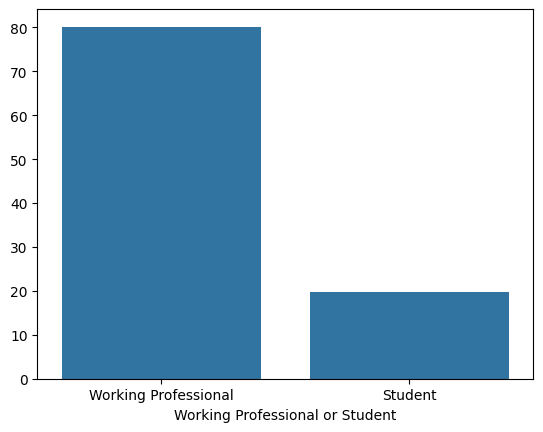

In [7]:

sns.barplot(x=df_percentage.index, y=df_percentage.values)

foreign data is due to the fact that some data are only for student or workers

## Depression

Depression
0    115133
1     25567
Name: count, dtype: int64


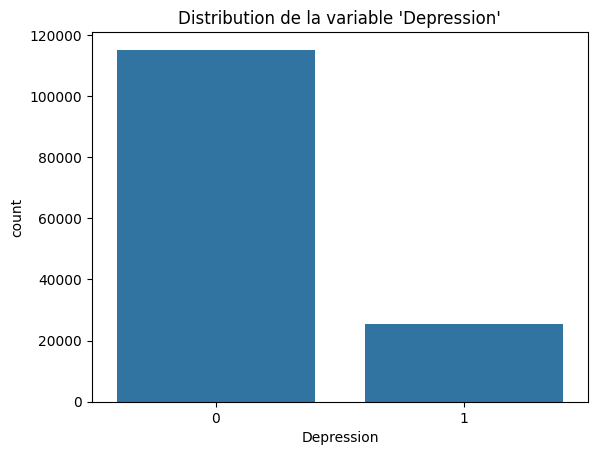

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Analyse de la variable cible
print(df['Depression'].value_counts())  # Distribution des classes
sns.countplot(x='Depression', data=df)
plt.title("Distribution de la variable 'Depression'")
plt.show()


## Corelation matrix

<Axes: >

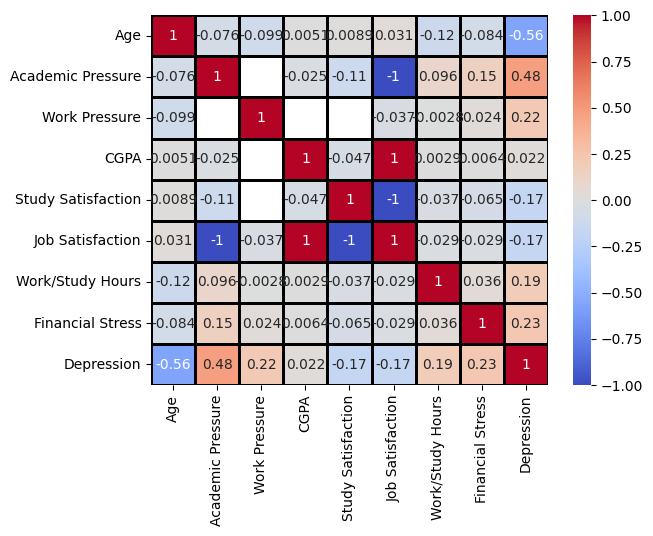

In [9]:
df_num = df.select_dtypes(include=[np.number]).drop(columns=["id"])
correlation = df_num.corr()
sns.heatmap(correlation, annot=True , cmap='coolwarm' , linewidths=1 , linecolor='black')


In [10]:
correlation

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.000000,-0.075956,-0.098924,0.005129,0.008862,0.030793,-0.118356,-0.083589,-0.564671
Academic Pressure,-0.075956,1.000000,NaN,-0.025195,-0.112228,-1.000000,0.095650,0.152105,0.475037
Work Pressure,-0.098924,NaN,1.000000,NaN,NaN,-0.036958,-0.002808,0.024412,0.216634
CGPA,0.005129,-0.025195,NaN,1.000000,-0.047078,1.000000,0.002875,0.006398,0.021729
Study Satisfaction,0.008862,-0.112228,NaN,-0.047078,1.000000,-1.000000,-0.036934,-0.065001,-0.168014
Job Satisfaction,0.030793,-1.000000,-0.036958,1.000000,-1.000000,1.000000,-0.029227,-0.029160,-0.168543
Work/Study Hours,-0.118356,0.095650,-0.002808,0.002875,-0.036934,-0.029227,1.000000,0.036134,0.191746
Financial Stress,-0.083589,0.152105,0.024412,0.006398,-0.065001,-0.029160,0.036134,1.000000,0.227237
Depression,-0.564671,0.475037,0.216634,0.021729,-0.168014,-0.168543,0.191746,0.227237,1.000000


significant corrlation with depression :

- Age
- Academic pressure

## distribution


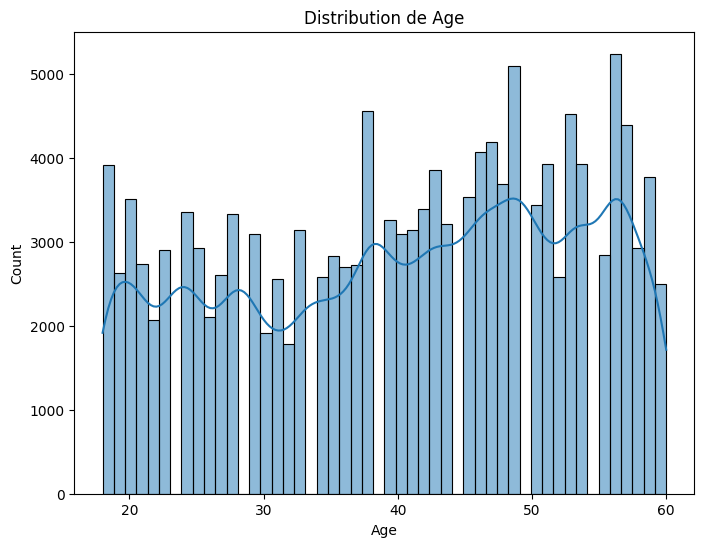

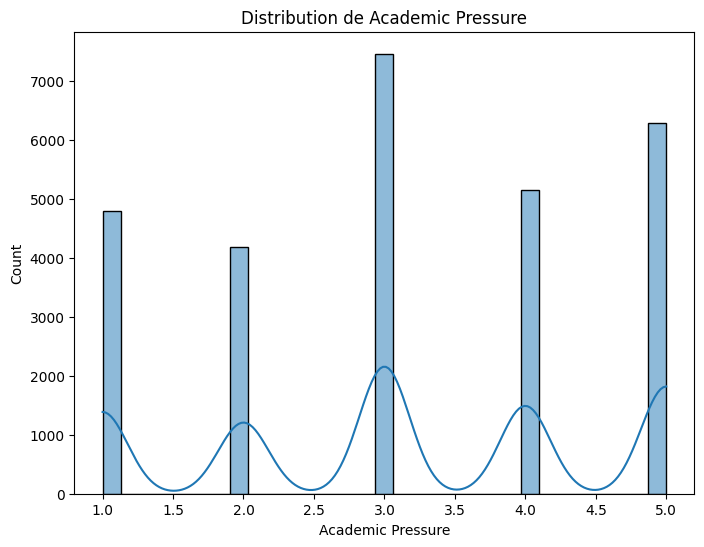

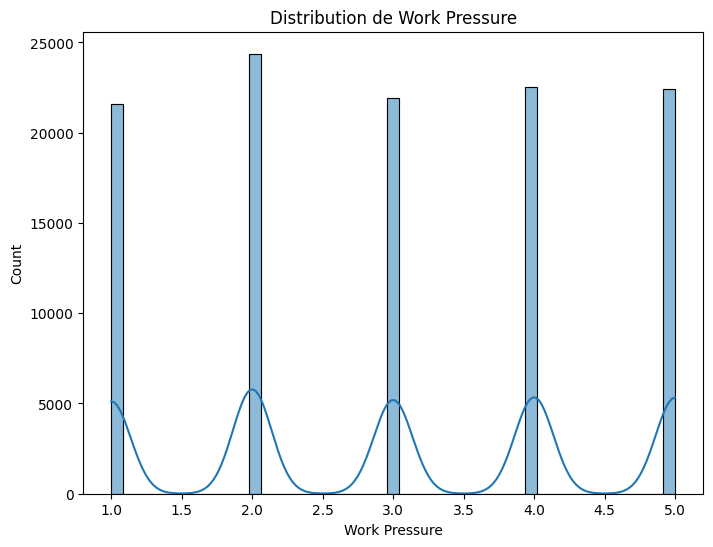

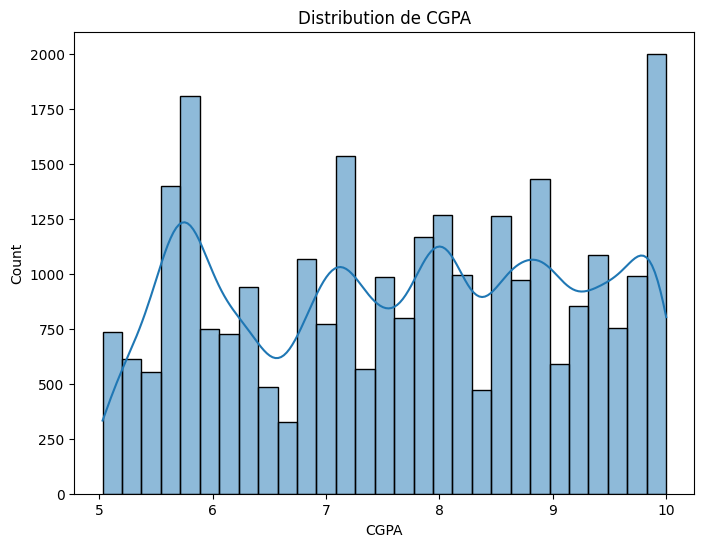

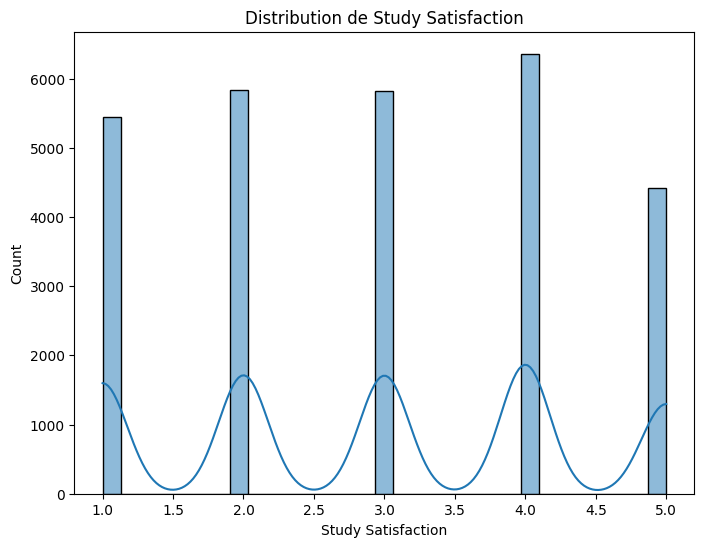

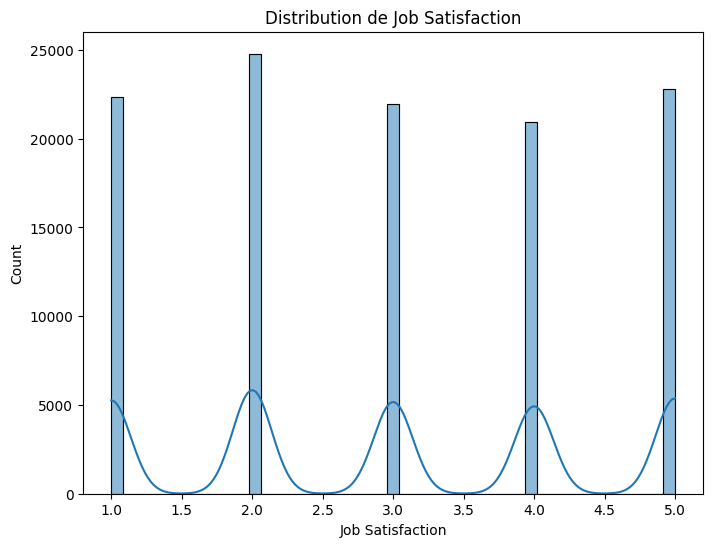

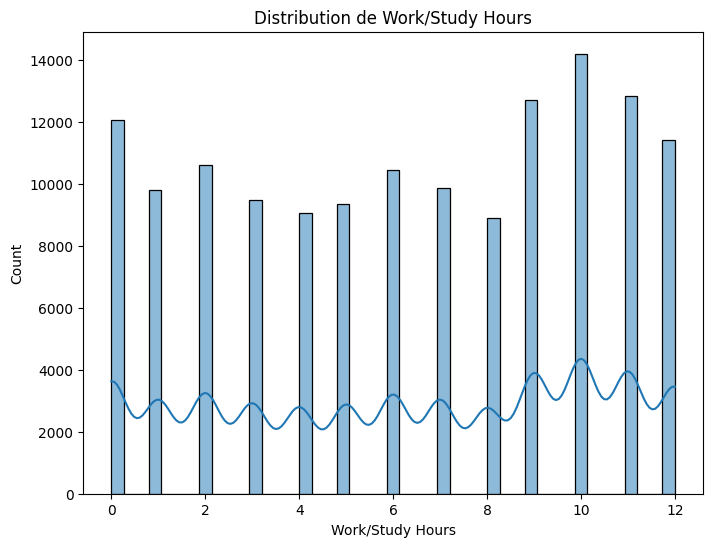

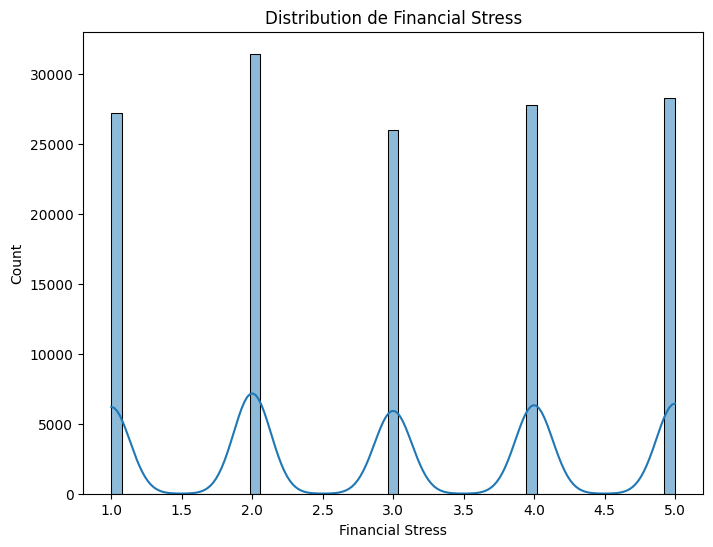

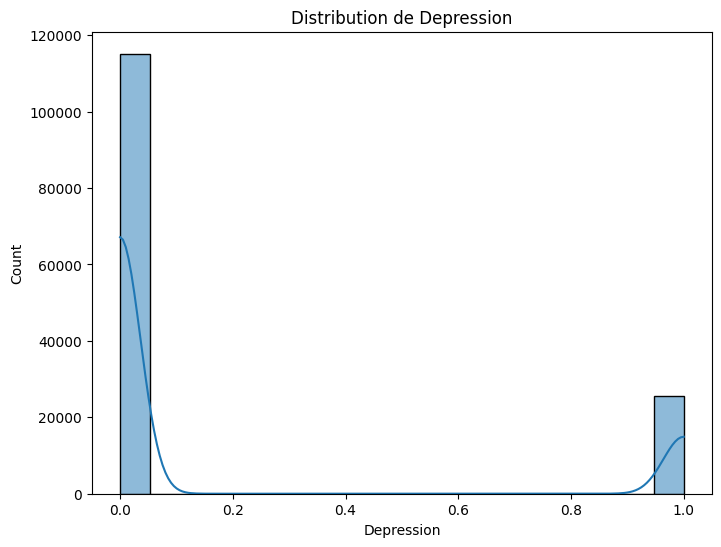

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_num.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_num[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()


## Categorial Variable

In [12]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [13]:
df_cat = df.select_dtypes(exclude=[np.number])

In [14]:
df_num.shape, df.shape , df_cat.shape
# 19 because i drop target var

((140700, 9), (140700, 20), (140700, 10))

In [15]:
for col in df_cat.columns:
    print(f"{col} : {df_cat[col].unique()}")

Name : ['Aaradhya' 'Vivan' 'Yuvraj' 'Rhea' 'Vani' 'Ritvik' 'Rajveer' 'Aishwarya'
 'Simran' 'Utkarsh' 'Aahana' 'Tejas' 'Aadhya' 'Kiran' 'Aditi' 'Suhani'
 'Jiya' 'Bhavesh' 'Armaan' 'Ishaani' 'Prachi' 'Pratyush' 'Abhinav'
 'Siddhesh' 'Aditya' 'Aarav' 'Asha' 'Kashish' 'Prisha' 'Chhavi' 'Tanmay'
 'Vihaan' 'Shiv' 'Anvi' 'Darsh' 'Samar' 'Raunak' 'Mahi' 'Shaurya' 'Vidya'
 'Jai' 'Ayush' 'Ansh' 'Anand' 'Yashvi' 'Shrey' 'Ritika' 'Mihir' 'Isha'
 'Arjun' 'Rohan' 'Pratham' 'Nirvaan' 'Ishaan' 'Aarya' 'Riya' 'Aariv'
 'Raghavendra' 'Mahika' 'Abhishek' 'Harshil' 'Janvi' 'Kartikeya' 'Shivam'
 'Advait' 'Reyansh' 'Saanvi' 'Ivaan' 'Pallavi' 'Sneha' 'Ayaan' 'Aakash'
 'Raghav' 'Satyam' 'Aarush' 'Vibha' 'Rupal' 'Sanya' 'Mira' 'Rashi' 'Shlok'
 'Harsha' 'Divya' 'Pranav' 'Hrithik' 'Tushar' 'Garima' 'Zoya' 'Kian'
 'Navya' 'Lakshay' 'Kriti' 'Palak' 'Aryan' 'Parth' 'Ishan' 'Rupak'
 'Atharv' 'Aarti' 'Anirudh' 'Kabir' 'Sanjeev' 'Sanket' 'Tara' 'Gagan'
 'Anjali' 'Gaurav' 'Vikram' 'Yogesh' 'Ila' 'Rishi' 'Ayansh' 'Kolkat

In [16]:
df["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

i think it will be hard to clean

In [17]:
from ydata_profiling import ProfileReport

/home/jules/anaconda3/envs/kaggle/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
report = ProfileReport(df)

In [19]:
report

ModuleNotFoundError: No module named 'ipywidgets'

# Preprocessing

In [20]:
import pandas as pd

def preprocess_dataframe(df, drop_columns, merge_columns, fill_value=0):
    """
    Preprocess a DataFrame by merging columns, encoding categorical variables, and cleaning data.
    
    Args:
    - df (pd.DataFrame): The DataFrame to preprocess.
    - drop_columns (list): List of columns to drop from the DataFrame.
    - merge_columns (dict): Dictionary to merge columns. 
      Example: {"Pressure": ["Academic Pressure", "Work Pressure"]}.
    - fill_value (int/float): Value to fill NaN before merging (default: 0).
    
    Returns:
    - df_features_encoded_clean (pd.DataFrame): The preprocessed and cleaned DataFrame.
    """
    # Copy the DataFrame to avoid accidental modifications
    df = df.copy()

    # Merge the specified columns
    for new_column, columns_to_merge in merge_columns.items():
        df[new_column] = df[columns_to_merge].fillna(fill_value).sum(axis=1)

    # Drop unnecessary columns
    df_features = df.drop(columns=drop_columns)

    # Encode categorical variables
    df_features_encoded = pd.get_dummies(df_features, drop_first=True)

    # Drop rows with missing values
    df_features_encoded_clean = df_features_encoded.dropna()

    return df_features_encoded_clean





In [21]:

merge_columns = {
    "Pressure": ["Academic Pressure", "Work Pressure"],
    "Satisfaction": ["Study Satisfaction", "Job Satisfaction"]
}

drop_columns = ["id", "Academic Pressure", "Work Pressure", "Study Satisfaction", 
                "Job Satisfaction", "CGPA", "Degree", "Name"]

df_features_encoded_clean = preprocess_dataframe(
    df=df, 
    drop_columns=drop_columns, 
    merge_columns=merge_columns, 
    fill_value=0
)

# Vérifier le résultat
df_features_encoded_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 140696 entries, 0 to 140699
Columns: 227 entries, Age to Family History of Mental Illness_Yes
dtypes: bool(221), float64(5), int64(1)
memory usage: 37.2 MB


# split

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


X = df_features_encoded_clean.drop(columns=["Depression"])
y = df_features_encoded_clean["Depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Test Multiple Models

In [23]:

# Dictionnaire des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
}

# Initialiser une liste pour stocker les résultats
results = []

# Boucle pour entraîner et évaluer chaque modèle
for name, model in models.items():
    print(f"Entraînement du modèle : {name}")
    
    # Validation croisée
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    
    # Entraînement du modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    
    # Prédictions sur les données de test
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    # Stocker les résultats
    results.append({
        "Model": name,
        "Mean CV Score": mean_cv_score,
        "Test Accuracy": test_accuracy,
    })

# Convertir les résultats en DataFrame pour un affichage clair
results_df = pd.DataFrame(results)
print("\nRésumé des performances des modèles :")
print(results_df)

Entraînement du modèle : Logistic Regression
Entraînement du modèle : Random Forest
Entraînement du modèle : Gradient Boosting

Résumé des performances des modèles :
                 Model  Mean CV Score  Test Accuracy
0  Logistic Regression       0.937471       0.938557
1        Random Forest       0.935481       0.936958
2    Gradient Boosting       0.937205       0.939090


# improve with hyperparameter tuning of XGBoost

In [24]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score = cv_scores.mean()

xgb.fit(X_train, y_train)
test_predictions = xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)


# Use the Test set to make predictions

In [25]:

df_train = pd.read_csv(f"{base_path}/train.csv")
df_test = pd.read_csv(f"{base_path}/test.csv")

In [26]:
# Preserve the IDs from the test dataset
test_ids = df_test["id"]

# Columns to merge
merge_columns = {
    "Pressure": ["Academic Pressure", "Work Pressure"],
    "Satisfaction": ["Study Satisfaction", "Job Satisfaction"]
}

# Columns to drop
drop_columns = ["id", "Academic Pressure", "Work Pressure", 
                "Study Satisfaction", "Job Satisfaction", 
                "CGPA", "Degree", "Name"]

# Preprocess the training dataset
df_train_preprocessed = preprocess_dataframe(df_train, drop_columns, merge_columns)

# Preprocess the test dataset
df_test_preprocessed = preprocess_dataframe(df_test, drop_columns, merge_columns)

# Handle missing and extra columns between train and test datasets
missing_columns = set(df_train_preprocessed.columns) - set(df_test_preprocessed.columns)
extra_columns = set(df_test_preprocessed.columns) - set(df_train_preprocessed.columns)

# Add missing columns in the test dataset with default values (0)
for col in missing_columns:
    df_test_preprocessed[col] = 0

# Remove extra columns from the test dataset
df_test_preprocessed = df_test_preprocessed.drop(columns=extra_columns)

# Reorder test columns to match the training dataset
df_test_preprocessed = df_test_preprocessed[df_train_preprocessed.columns]

# Check and remove the target column from the test dataset (if it exists)
if "Depression" in df_test_preprocessed.columns:
    df_test_preprocessed = df_test_preprocessed.drop(columns=["Depression"])

# Extract X_train and y_train
X_train = df_train_preprocessed.drop(columns=["Depression"])  # Example: 'Depression' is the target variable
y_train = df_train_preprocessed["Depression"]

# Train the model
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Make predictions on the test dataset
test_predictions = xgb.predict(df_test_preprocessed)

# Associate the IDs with the predictions
predictions_with_ids = pd.DataFrame({
    "id": test_ids,
    "Depression_Prediction": test_predictions
})


/tmp/ipykernel_3695/3646074373.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_preprocessed[col] = 0
/tmp/ipykernel_3695/3646074373.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_preprocessed[col] = 0
/tmp/ipykernel_3695/3646074373.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame

In [27]:
predictions_with_ids.to_csv("submission.csv", index=False)

# Cat Boost 

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, accuracy_score

# Load the data
df_train = pd.read_csv(f"{base_path}/train.csv")
df_test = pd.read_csv(f"{base_path}/test.csv")

# Define the target column and features
target_column = "Depression"  # Modify according to your dataset
X_train = df_train.drop(columns=[target_column])
y_train = df_train[target_column]
X_test = df_test.copy()

# Columns to merge
merge_columns = {
    "Overall Pressure": ["Academic Pressure", "Work Pressure"],
    "Overall Satisfaction": ["Study Satisfaction", "Job Satisfaction"]
}

# Step 1: Class to merge specified columns
class AddMergedColumns(BaseEstimator, TransformerMixin):
    def __init__(self, merge_columns, fill_value=0):
        self.merge_columns = merge_columns
        self.fill_value = fill_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for new_column, columns_to_merge in self.merge_columns.items():
            X[new_column] = X[columns_to_merge].fillna(self.fill_value).sum(axis=1)
        return X

# Step 2: Automatically detect column types
def detect_column_types(df):
    categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
    numeric_features = df.select_dtypes(include=["number"]).columns.tolist()
    return numeric_features, categorical_features

# Step 3: Preprocessing for CatBoost
class PreprocessForCatBoost(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        numeric_features, categorical_features = detect_column_types(X)
        X[categorical_features] = X[categorical_features].fillna("missing")  # Fill missing categorical values
        X = X.fillna(0)  # Fill missing numerical values
        self.categorical_features = categorical_features
        return X

# Step 4: Complete pipeline with CatBoost
class CatBoostWithCategorical(BaseEstimator, TransformerMixin):
    def __init__(self, catboost_params=None):
        self.catboost_params = catboost_params or {"verbose": 0, "random_state": 42}
        self.model = None

    def fit(self, X, y):
        # Automatically detect categorical columns
        _, categorical_features = detect_column_types(X)
        cat_features_indices = [X.columns.get_loc(col) for col in categorical_features]
        
        # Initialize and train the CatBoost model
        self.model = CatBoostClassifier(**self.catboost_params)
        self.model.fit(X, y, cat_features=cat_features_indices)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Create the complete pipeline
pipeline = Pipeline(steps=[
    ("add_columns", AddMergedColumns(merge_columns=merge_columns)),  # Merge columns
    ("preprocessor", PreprocessForCatBoost()),  # Automatic preprocessing
    ("model", CatBoostWithCategorical())  # CatBoost model with categorical column handling
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate performance
print("Model performance on training data:")
train_predictions = pipeline.predict(X_train)
print(classification_report(y_train, train_predictions))
print(f"Training accuracy: {accuracy_score(y_train, train_predictions):.2f}")

# Add predictions to the test DataFrame
df_test["Predictions"] = predictions




Model performance on training data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    115133
           1       0.87      0.84      0.86     25567

    accuracy                           0.95    140700
   macro avg       0.92      0.91      0.91    140700
weighted avg       0.95      0.95      0.95    140700

Training accuracy: 0.95
The predictions have been saved to ./data/playground-series-s4e11/predictions.csv


In [9]:
# Save the results
output_path = f"{base_path}/predictions.csv"
df_test[["id","Predictions"]].to_csv(output_path, index=False)
print(f"The predictions have been saved to {output_path}")

The predictions have been saved to ./data/playground-series-s4e11/predictions.csv


In [7]:
pipeline 

Pipeline(steps=[('add_columns',
                 AddMergedColumns(merge_columns={'Overall Pressure': ['Academic '
                                                                      'Pressure',
                                                                      'Work '
                                                                      'Pressure'],
                                                 'Overall Satisfaction': ['Study '
                                                                          'Satisfaction',
                                                                          'Job '
                                                                          'Satisfaction']})),
                ('preprocessor', PreprocessForCatBoost()),
                ('model',
                 CatBoostWithCategorical(catboost_params={'random_state': 42,
                                                          'verbose': 0}))])

In [17]:

df_test[['id','Depression']].head(10)
df_test[["id","Depression"]].to_csv("submission.csv", index=False)